In [13]:
# Imports and data loading

import pandas as pd
import matplotlib.pyplot as plt

# Load trading data
trades = pd.read_csv(
    "C:\\Users\\blazo\\Documents\\Misc\\QJ\\quant-journey\\research\\ftmo\\data\\Z6+_trd.csv"
)

trades = trades.sort_values('Close')
trades['equity'] = trades['Profit'].cumsum()

In [14]:
# Summary of overall performance

print("\n" + "=" * 80)
print("COMPARATIVE SUMMARY")
print("=" * 80)
print(f"Z6+ Performance: ${trades['Profit'].sum():.2f} ({len(trades)} trades)")

# Calculate win/loss statistics for each strategy
z6p_wins = trades[trades['Profit'] > 0]['Profit']
z6p_losses = trades[trades['Profit'] <= 0]['Profit']

print(f"\nZ6+ Statistics:")
trades['Close'] = pd.to_datetime(trades['Close'])
print(f"  Average Trades per Day: {len(trades) / trades['Close'].dt.date.nunique():.2f}")
print(f"  Average Win: ${z6p_wins.mean():.2f} ({len(z6p_wins)} winning trades)")
print(f"  Average Loss: ${z6p_losses.mean():.2f} ({len(z6p_losses)} losing trades)")
print(f"  Win/Loss Ratio: {(len(z6p_wins) / (len(z6p_losses))):.2f}")
print(f"  Win Percentage: {(len(z6p_wins) / (len(z6p_wins) + len(z6p_losses))) * 100:.2f} %")


COMPARATIVE SUMMARY
Z6+ Performance: $80221.06 (3237 trades)

Z6+ Statistics:
  Average Trades per Day: 2.36
  Average Win: $130.18 (2054 winning trades)
  Average Loss: $-158.22 (1183 losing trades)
  Win/Loss Ratio: 1.74
  Win Percentage: 63.45 %


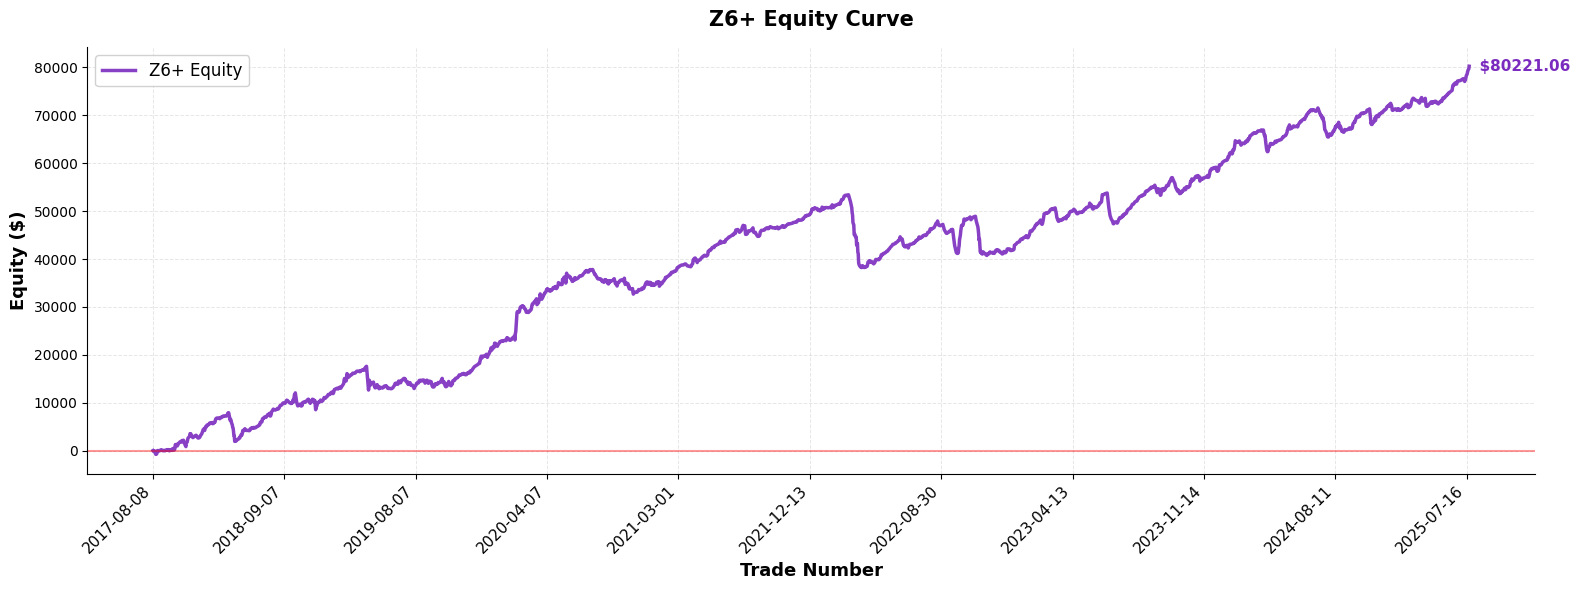

In [15]:
# Create equity curve plot
fig, ax = plt.subplots(figsize=(16, 6))

# Create positions for x-axis (just use sequential indices)
positions = range(len(trades))

# Plot equity curve
ax.plot(positions, trades['equity'].values, linewidth=2.5, 
    color='#7B2CBF', label='Z6+ Equity', alpha=0.9)

# Add final value annotation
final_value = trades['equity'].iloc[-1]
final_pos = len(trades) - 1
ax.text(final_pos, final_value, f'  ${final_value:.2f}', 
    va='center', ha='left', fontsize=11, fontweight='bold', color='#7B2CBF')

ax.set_xlabel('Trade Number', fontsize=13, fontweight='bold')
ax.set_ylabel('Equity ($)', fontsize=13, fontweight='bold')
ax.set_title('Z6+ Equity Curve', fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.axhline(y=0, color='red', linestyle='-', linewidth=1.5, alpha=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis ticks with dates at regular intervals
tick_interval = max(1, len(trades) // 10)
tick_positions = list(range(0, len(trades), tick_interval))
ax.set_xticks(tick_positions)
ax.set_xticklabels([trades['Close'].iloc[i].strftime('%Y-%m-%d') for i in tick_positions], 
            rotation=45, ha='right', fontsize=11)

plt.tight_layout()
plt.show()

In [16]:
# Calculate daily profit/loss
trades['Date'] = trades['Close'].dt.date
daily_pnl = trades.groupby('Date')['Profit'].sum()

# Maximum loss in a single day
max_daily_loss = daily_pnl.min()

# Calculate drawdown
cumulative_pnl = daily_pnl.cumsum()
running_max = cumulative_pnl.cummax()
drawdown = cumulative_pnl - running_max
max_drawdown = drawdown.min()

print("\n" + "=" * 80)
print("RISK METRICS")
print("=" * 80)
print(f"Maximum Daily Loss: ${max_daily_loss:.2f}")
print(f"Maximum Drawdown: ${max_drawdown:.2f}")
print(f"Date of Max Daily Loss: {daily_pnl.idxmin()}")
print(f"Date of Max Drawdown: {drawdown.idxmin()}")


RISK METRICS
Maximum Daily Loss: $-6083.82
Maximum Drawdown: $-15075.49
Date of Max Daily Loss: 2022-03-08
Date of Max Drawdown: 2022-03-10
